# Comparison between SGRBs and LGRBs using the Swift/BAT data integrated over its energy range (15-150 keV)

All data extracted from: https://swift.gsfc.nasa.gov/archive/grb_table/, filtering for `BAT` $T_{90} > 2$ `seconds` for LGRBs and `BAT` $T_{90} > 2$ `seconds`.

In [1]:
import pandas as pd
import numpy as np

LGRBs_data = pd.read_csv('lgrb_table_BAT_T90grt2s.txt', sep="\t", header=0)
SGRBs_data = pd.read_csv('sgrb_table_BAT_T90lwt.txt', sep="\t", header=0)

LGRBs_data

,GRB,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],BAT Fluence 90% Error (15-150 keV) [10^-7 erg/cm^2],XRT RA (J2000),XRT Dec (J2000),...,XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s],UVOT RA (J2000),UVOT Dec (J2000),UVOT Time to First Observation [sec],UVOT Magnitude,Other Observatory Detections,Redshift,Host Galaxy,Comments,References
0,240222A,08:51:31,1216804,143.209,-68.034,3.94,2.50,0.30,09:32:54.10,-68:01:49.7,...,NaN,NaN,NaN,98,n/aV>18.5,"Fermi (GBM), GECAM, GRBAlpha",NaN,NaN,UVOT: no detection,NaN
1,240218A,02:00:00,1215912,161.810,1.295,66.93,52.00,3.00,10:47:11.24,01:16:34.8,...,327,NaN,NaN,158,NaN,"REM (60cm), VLT, Fermi (GBM), Konus-Wind, LBT,...",6.782 (VLT: absorption),NaN,NaN,NaN
2,240205B,22:13:06,1213095,351.466,-55.123,47.29,260.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Fermi (GBM), MASTER, BOOTES-7 (0.6m), Skynet (...",0.824 (VLT: absorption),NaN,This GRB is Sun constrained for Swift observat...,NaN
3,240204A,15:07:50.63,1212898,104.290,1.078,18.93,100.00,0.00,06:56:43.57,01:01:36.0,...,NaN,NaN,NaN,4800,V>19.32,"Fermi (GBM), Mondy (AZT-33IK), Montarrenti Obs...",NaN,NaN,"BAT: Due to a telemetry outage, no realtime BA...",NaN
4,240123A,11:05:46,1210276,199.287,60.607,115.30,16.00,2.00,13:17:23.67,60:37:06.5,...,73,13:17:23.25,60:37:04.4,151,NaN,"Mondy (AZT-33IK), Fermi (GBM: Sub-Threshold), ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,041220,22:58:27,100433,291.288,60.598,5.600,3.83,0.28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAT: FRED|No AT slew|XRT: no observation|UVOT:...,NaN
1382,041219C,20:30:34,100380*,343.926,-76.744,4.800,13.10,0.73,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAT: 3 spikes|No AT slew|XRT: no observation|U...,NaN
1383,041219B,15:38:48,100367*,167.674,-33.458,30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,IPN,NaN,NaN,"BAT: 1 big spike, 3 little spikes|No AT slew|X...",NaN
1384,041219A,01:42:18,100307|100319,6.154,62.847,520,1550.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BAT: bright, long, multipeaked|No AT slew|XRT:...",NaN


In [2]:
print('Percentage of LGRBs detected by Swift:', 100*len(LGRBs_data)/(len(SGRBs_data)+len(LGRBs_data)), '%')
print('Percentage of SGRBs detected by Swift:', 100-100*len(LGRBs_data)/(len(SGRBs_data)+len(LGRBs_data)), '%')

Percentage of LGRBs detected by Swift: 90.94488188976378 %
Percentage of SGRBs detected by Swift: 9.055118110236222 %


## LGRBs

In [3]:
fluence_LGRBs =  np.asarray(LGRBs_data['BAT Fluence (15-150 keV) [10^-7 erg/cm^2]'], dtype=float)
time_LGRBs = LGRBs_data['BAT T90 [sec]']

# gotta get rid of some characters like '>' and '<' to convert to float
for temps, i in zip(time_LGRBs, range(len(time_LGRBs))):
    try:
        time_LGRBs[i] = float(temps)
    except ValueError:
        time_LGRBs[i] = float(temps.strip('~').strip('>').strip('<'))

time_LGRBs = np.asarray(time_LGRBs, dtype=float) 

mean_energy = 0.5*(150-15) # to compute the flux we'll take the mean energy of the range
# to rougly compute the flux, we divide the fluence by the duration of the burst (T_{90}) and the mean energy, squared (once to 
# transform ergs into photons and twice to transform it into photons/keV)
flux_LGRBs = fluence_LGRBs*6.242*10**1/(time_LGRBs*(mean_energy**2)) # multiplied by 6.242*10**8 to convert ergs to keV and 
                                                                     # by 10**(-7), the order of magnitude of the fluence

C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\2677979521.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_LGRBs[i] = float(temps)
C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\2677979521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_LGRBs[i] = float(temps.strip('~').strip('>').strip('<'))


## SGRBs

In [4]:
fluence_SGRBs = SGRBs_data['BAT Fluence (15-150 keV) [10^-7 erg/cm^2]']
for flu, i in zip(fluence_SGRBs, range(len(fluence_SGRBs))):
    try: 
        fluence_SGRBs[i] = float(flu)
    except ValueError:
        print('ValueError')
        print(flu)
        if flu == '':
            fluence_SGRBs[i] = None
        else:
            fluence_SGRBs[i] = float(flu.strip('n/a').strip('~'))

fluence_SGRBs =  np.asarray(fluence_SGRBs, dtype=float)


time_SGRBs = SGRBs_data['BAT T90 [sec]']
for temps, i in zip(time_SGRBs, range(len(time_SGRBs))):
    try:
        time_SGRBs[i] = float(temps)
    except ValueError:
        if 'to' in temps:
            ts = temps.split(' to ')
            t_1, t_2 = float(ts[0].strip('~')), float(ts[1].strip('~'))
            temps = 0.5*(t_1+t_2)
            time_SGRBs[i] = temps
        else:
            time_SGRBs[i] = float(temps.strip('~').strip('>').strip('<'))

time_SGRBs = np.asarray(time_SGRBs, dtype=float)
mean_energy = 0.5*(150-15)
flux_SGRBs = fluence_SGRBs*6.242*10**1/(time_SGRBs*(mean_energy**2)) # multiplied by 6.242*10**8 to convert ergs to keV and by 10**(-7), 
                                                   # the order of magnitude of the fluence

C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\3688422407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fluence_SGRBs[i] = float(flu)


ValueError
n/a1.5


C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\3688422407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fluence_SGRBs[i] = float(flu.strip('n/a').strip('~'))


ValueError
~0.9


C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\3688422407.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_SGRBs[i] = float(temps)
C:\Users\iriso\AppData\Local\Temp\ipykernel_11988\3688422407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_SGRBs[i] = temps


## Plot
### All fluences from the Swift database

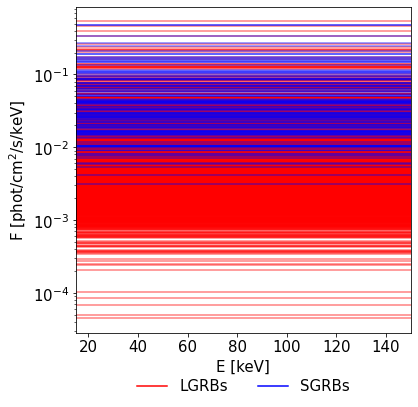

In [6]:
LGRBs = pd.DataFrame({'GRB': LGRBs_data['GRB'], 'BAT Fluence (15-150 keV) [phot/cm^2/s/keV]': flux_LGRBs})
LGRBs

import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size': 15})
matplotlib.rc('axes', labelsize=15)

plt.figure(figsize=(6,6))
# E_array_LGRBs = [mean_energy for i in range(len(flux_LGRBs))]
# E_array_SGRBs = [mean_energy for i in range(len(flux_SGRBs))]
# plt.scatter(E_array_LGRBs, flux_LGRBs, label = 'LGRBs')
# plt.scatter(E_array_SGRBs, flux_SGRBs, label = 'SGRBs')
GRBs = [flux_LGRBs, flux_SGRBs]
GRBs_labs = ['LGRBs', 'SGRBs']
GRBs_colors = ['r', 'b']
for GRB, GRBs_color in zip(GRBs, GRBs_colors):
    for flux in GRB:
        plt.axhline(y = flux,  c = GRBs_color, linestyle = '-', alpha = 0.5)

plt.axhline(y = flux_LGRBs[0],  c = GRBs_colors[0], linestyle = '-', label = 'LGRBs')
plt.axhline(y = flux_SGRBs[0],  c = GRBs_colors[1], linestyle = '-', label = 'SGRBs')
plt.xlim(15, 150)
plt.xlabel('E [keV]')
plt.ylabel('F [phot/cm$^2$/s/keV]')
plt.legend(loc = 'upper center', bbox_to_anchor=[0.5, -0.1], ncol = 2, labelspacing = 0.05, frameon=False, fontsize = 15)
plt.yscale('log')

### Minimum and maximum values for each case (L/SGRBs)

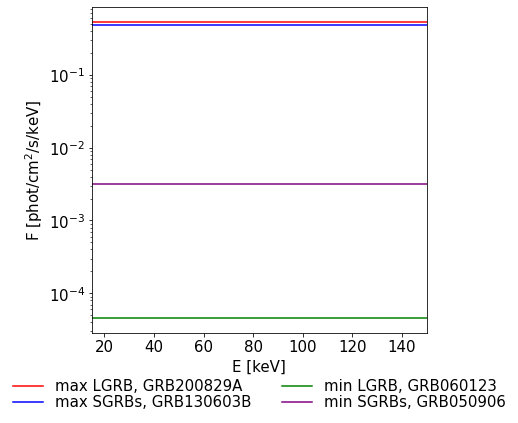

In [7]:
# find the maximum values
idx_max_LGRB, max_LGRB = np.nanargmax(flux_LGRBs), np.nanmax(flux_LGRBs)
idx_max_SGRB, max_SGRB = np.nanargmax(flux_SGRBs), np.nanmax(flux_SGRBs)

# find the minimum values
# in the case of LGRB we need to get rid of null values (0)
idx_min_LGRB = np.where(flux_LGRBs==np.nanmin(flux_LGRBs[np.nonzero(flux_LGRBs)]))[0][0]
min_LGRB = flux_LGRBs[idx_min_LGRB]
# minimum for SGRB
idx_min_SGRB, min_SGRB = np.nanargmin(flux_SGRBs), np.nanmin(flux_SGRBs)

# and their corresponding name
name_max_LGRB = LGRBs_data.loc[idx_max_LGRB]['GRB']
name_max_SGRB = SGRBs_data.loc[idx_max_SGRB]['GRB']


name_min_LGRB = LGRBs_data.loc[idx_min_LGRB]['GRB']
name_min_SGRB = SGRBs_data.loc[idx_min_SGRB]['GRB']


plt.figure(figsize=(6,6))
GRBs_labs = ['LGRBs', 'SGRBs']
GRBs_colors = ['r', 'b']

plt.axhline(y = max_LGRB,  c = GRBs_colors[0], linestyle = '-', label = 'max LGRB, GRB'  + name_max_LGRB)
plt.axhline(y = max_SGRB,  c = GRBs_colors[1], linestyle = '-', label = 'max SGRBs, GRB' + name_max_SGRB)

plt.axhline(y = min_LGRB,  c = 'g', linestyle = '-', label = 'min LGRB, GRB' + name_min_LGRB)
plt.axhline(y = min_SGRB,  c = 'purple', linestyle = '-', label = 'min SGRBs, GRB' + name_min_SGRB)

plt.xlim(15, 150)
plt.xlabel('E [keV]')
plt.ylabel('F [phot/cm$^2$/s/keV]')
plt.legend(loc = 'upper center', bbox_to_anchor=[0.5, -0.1], ncol = 2, labelspacing = 0.05, frameon=False, fontsize = 15)
plt.yscale('log')

Saved in a CSV file:

In [8]:
minmax_GRBs = pd.DataFrame({'GRB_name': [name_min_LGRB, name_min_SGRB, name_max_SGRB, name_max_LGRB], 
              'F [phot/cm^2/s/keV]': [min_LGRB, min_SGRB, max_SGRB, max_LGRB]})
minmax_GRBs.to_csv('minmax_GRBs.csv', index=False)  

## SGRB: GRB 170817A
Joint detection of a GRB and a GW.

Extracted from its GCN circular (https://gcn.gsfc.nasa.gov/other/G298048.gcn3):

> The estimated GRB duration is $\sim 2$ s and is best fit by a power-law function with an exponential high-energy cutoff from T0-0.75 to T0+1.25 s.  The power-law index is -0.88 +/- 0.44 and the cutoff energy, parametrized as Epeak, is 128.0 +/- 48.7 keV. The event fluence (10-1000 keV) in this time interval is (2.2 +/- 0.5)e-7 erg/cm^2.

Using the power law model formula from https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node221.html: $F=KE^{\alpha}$.

We get the constant from the fluence (the flux integrated over time and the energy range of the burst lightcurve, [erg/keV/cm$^2$]: 

\\[
K=\frac{2\cdot fluence}{T_{90}(E_f-E_i)(E_f^{\alpha}+E_i^{\alpha})}\ .
\\]
Then we get the flux in the units we want as $f=KE^{\alpha-1}$ [phot/s/cm$^2$/keV].

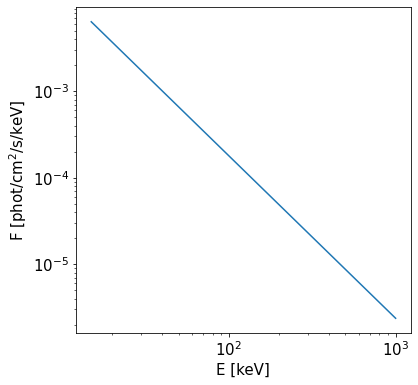

In [9]:
fluence = 2.2 *10**(-7) # erg/cm^2
E_cutoff = 128 # keV
E_ini = 10 # keV
E_fi = 1000 # keV
alpha = -0.88
T90 = 2 #s

E_values = np.linspace(15, 1000, 100)
K = 2*fluence*6.242*10**8/(T90*(E_fi-E_ini)*(E_fi**alpha+E_ini**alpha)) # the fluence is integrated over the range 10-1000 keV. 
# To compute the K constant of the model we must assume the power law keeps working for values higher than the cutoff energy

plt.figure(figsize=(6,6))
F_SGRB = K*E_values**(alpha-1)
plt.plot(E_values, F_SGRB) # we divide by the E (hence the (-1) in the exponent) to get the correct units, 
                                          # [phot/cm^2/s/keV]

plt.xlabel('E [keV]')
plt.ylabel('F [phot/cm$^2$/s/keV]')

plt.yscale('log')
plt.xscale('log')

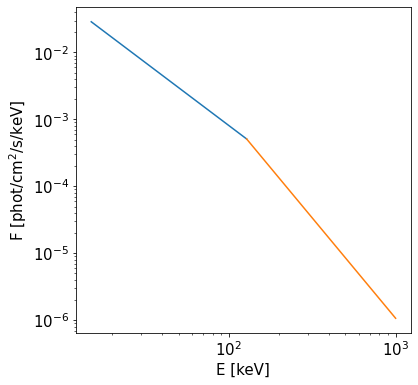

In [14]:
fluence = 2.2 *10**(-7) # erg/cm^2
E_cutoff = 128 # keV
E_ini = 10 # keV
E_fi = 1000 # keV
alpha = -0.88
T90 = 2 #s

K = 2*fluence*6.242*10**8/(T90*(E_fi-E_ini)*(E_fi**alpha+E_ini**alpha)) # the fluence is integrated over the range 10-1000 keV. 
# To compute the K constant of the model we must assume the power law keeps working for values higher than the cutoff energy.

beta=-2
K = 2*fluence*6.242*10**8/(T90*((E_cutoff-E_ini)*(E_cutoff**alpha+E_ini**alpha)+(E_fi-E_cutoff)*E_cutoff**alpha)) # the fluence is integrated over the range 10-1000 keV. 
K_prime = K*E_cutoff**(alpha-beta)

plt.figure(figsize=(6,6))

E_values_1 = np.linspace(15, E_cutoff, 100)
E_values_2 = np.linspace(E_cutoff, E_fi, 100)

F_SGRB_1 = K*E_values_1**(alpha-1)
F_SGRB_2 = K_prime*E_values_2**(beta-1)
plt.plot(E_values_1, F_SGRB_1) # we divide by the E (hence the (-1) in the exponent) to get the correct units, 
                                          # [phot/cm^2/s/keV]
plt.plot(E_values_2, F_SGRB_2)

plt.xlabel('E [keV]')
plt.ylabel('F [phot/cm$^2$/s/keV]')

plt.yscale('log')
plt.xscale('log')

In [21]:
E_values = np.concatenate((E_values_1, E_values_2))
F_SGRB = np.concatenate((F_SGRB_1, F_SGRB_2))

SGRB_spectrum_GRB170817A = pd.DataFrame({'E': E_values, 'F [phot/cm^2/s/keV]': F_SGRB})
SGRB_spectrum_GRB170817A.to_csv('SGRB_spectrum_GRB170817A.csv', index=False)

## LGRBs: GRB 060218
GRB connected to a SN.

Extracted from its GCN circular: https://gcn.gsfc.nasa.gov/other/060218.gcn3.

> The time-averaged spectrum from T-8 to T+2732 is best fit by a simple power-law model.  The power law index of the time-averaged spectrum is 2.5 +- 0.1.  The fluence in the 15-150 keV band is 6.8 +- 0.4 x 10^-6 erg/cm2.  The peak energy flux in 1.6 sec time interval starting from T+455.2 sec in the 15-150 keV band is 2.0 +- 1.1 x 10^-8 erg/cm2/sec.

We follow the same steps as previously. Redshift: $z = 0.033$.

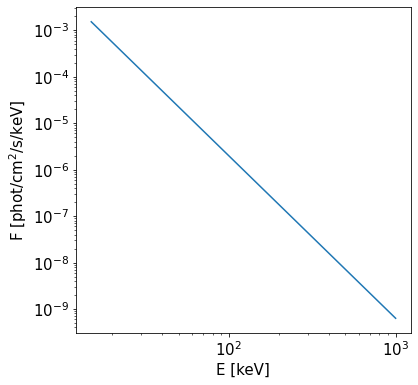

In [24]:
fluence_LGRB = 6.8*10**(-6) # erg/cm^2
E_ini_LGRB = 15 # keV
E_fi_LGRB = 150 # keV
alpha_LGRB = -2.5
T90_LGRB = 2732-(-8) #s

E_values_LGRB = np.linspace(15, 1000, 100)
K_LGRB = 2*fluence_LGRB*6.242*10**8/(T90_LGRB*(E_fi_LGRB-E_ini_LGRB)*(E_fi_LGRB**alpha_LGRB+E_ini_LGRB**alpha_LGRB)) # the fluence is integrated over the range 10-1000 keV. 
# To compute the K constant of the model we must assume the power law keeps working for values higher than the cutoff energy.

plt.figure(figsize=(6,6))
F_LGRB = K_LGRB*E_values_LGRB**(alpha_LGRB-1)
plt.plot(E_values_LGRB, F_LGRB) # we divide by the E (hence the (-1) in the exponent) to get the correct units, 
                                          # [phot/cm^2/s/keV]

plt.xlabel('E [keV]')
plt.ylabel('F [phot/cm$^2$/s/keV]')

plt.yscale('log')
plt.xscale('log')

In [25]:
LGRB_spectrum_GRB060218 = pd.DataFrame({'E': E_values_LGRB, 'F [phot/cm^2/s/keV]': F_LGRB})
LGRB_spectrum_GRB060218.to_csv('LGRB_spectrum_GRB060218.csv', index=False)

# Histogram

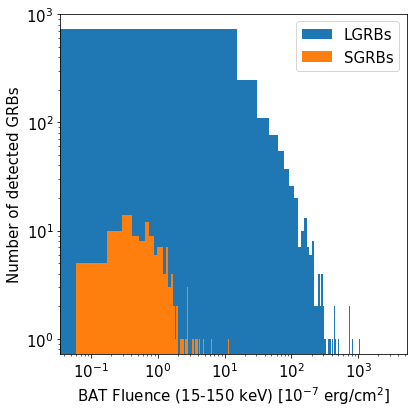

In [26]:
# to get rid of the nan values
fluence_LGRBs_wo_nan = fluence_LGRBs[fluence_LGRBs==fluence_LGRBs] 
# to produce an histogram from the fluence data
hist_LGRBs, hist_E_LGRBs = np.histogram(fluence_LGRBs_wo_nan, bins = 200)

# idem for SGRBs
fluence_SGRBs_wo_nan = fluence_SGRBs[fluence_SGRBs==fluence_SGRBs]
hist_SGRBs, hist_E_SGRBs = np.histogram(fluence_SGRBs_wo_nan, bins = 200)

# Plot
fig = plt.figure(figsize=(6,6))
plt.stairs(hist_LGRBs, hist_E_LGRBs, fill = True, label = 'LGRBs')
plt.stairs(hist_SGRBs, hist_E_SGRBs, fill = True, label = 'SGRBs')

plt.legend()
plt.xlabel('BAT Fluence (15-150 keV) [10$^{-7}$ erg/cm$^2$]')
plt.ylabel('Number of detected GRBs')
plt.yscale('log')
plt.xscale('log')

fig.tight_layout()
plt.savefig('GRBs_BAT_fluence_distribution.png', bbox_inches='tight')